In [1]:
import numpy as np
import pandas as pd

from helpers.cell_type_naming import weird_to_nice
from helpers import creating_mixtures
from helpers.loading_single_cell_cohorts import load_tirosh

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io

plotly.io.renderers.default = "jupyterlab+png"

In [3]:
rng = np.random.default_rng(seed=0)

# load & prep data

In [4]:
!gsutil ls gs://liulab/downloaded_manually/derek_csx_tcga_skcm

gs://liulab/downloaded_manually/derek_csx_tcga_skcm/CIBERSORTx_Job6_cell_type_sourceGEP.txt
gs://liulab/downloaded_manually/derek_csx_tcga_skcm/CIBERSORTx_Job6_jerbyarnon_for_cibersortx_sigmatrix_inferred_phenoclasses.CIBERSORTx_Job6_jerbyarnon_for_cibersortx_sigmatrix_inferred_refsample.bm.K999.txt
gs://liulab/downloaded_manually/derek_csx_tcga_skcm/CIBERSORTx_Job7_Results.csv
gs://liulab/downloaded_manually/derek_csx_tcga_skcm/CIBERSORTx_Job7_Results.html
gs://liulab/downloaded_manually/derek_csx_tcga_skcm/CIBERSORTx_Job7_Results.pdf
gs://liulab/downloaded_manually/derek_csx_tcga_skcm/CIBERSORTx_Job7_Results.txt
gs://liulab/downloaded_manually/derek_csx_tcga_skcm/CIBERSORTx_Job7_error_log.txt
gs://liulab/downloaded_manually/derek_csx_tcga_skcm/CIBERSORTx_Job7_jerbyarnon_for_cibersortx_sigmatrix_inferred_phenoclasses.CIBERSORTx_Job7_jerbyarnon_for_cibersortx_sigmatrix_inferred_refsample.bm.K999.txt
gs://liulab/downloaded_manually/derek_csx_tcga_skcm/CIBERSORTx_Job7_runtime_log.txt
gs:

## load (real) TCGA SKCM mixtures

In [5]:
# mixtures_tcga_skcm = helpers.datasets.load_tcga_skcm_mixtures()

In [6]:
path = "gs://liulab/downloaded_manually/derek_csx_tcga_skcm/skcm_rnaseqv2_normalized_clean.txt"

mixtures_tcga_skcm = pd.read_csv(
    path,
    sep="\t",
    # nrows=10,
    index_col=0
)

In [7]:
mixtures_tcga_skcm

,TCGA.3N.A9WB.06A.11R.A38C.07,TCGA.3N.A9WC.06A.11R.A38C.07,TCGA.3N.A9WD.06A.11R.A38C.07,TCGA.BF.A1PU.01A.11R.A18S.07,TCGA.BF.A1PV.01A.11R.A18U.07,TCGA.BF.A1PX.01A.12R.A18T.07,TCGA.BF.A1PZ.01A.11R.A18S.07,TCGA.BF.A1Q0.01A.21R.A18S.07,TCGA.BF.A3DJ.01A.11R.A20F.07,TCGA.BF.A3DL.01A.11R.A20F.07,...,TCGA.XV.AB01.06A.12R.A40A.07,TCGA.YD.A89C.06A.11R.A37K.07,TCGA.YD.A9TA.06A.11R.A39D.07,TCGA.YD.A9TB.06A.12R.A40A.07,TCGA.YG.AA3N.01A.11R.A38C.07,TCGA.YG.AA3O.06A.11R.A38C.07,TCGA.YG.AA3P.06A.11R.A38C.07,TCGA.Z2.A8RT.06A.11R.A37K.07,TCGA.Z2.AA3S.06A.11R.A39D.07,TCGA.Z2.AA3V.06A.11R.A39D.07
gene_id,,,,,,,,,,,,,,,,,,,,,
A1BG,381.0662,195.1822,360.8794,176.3994,216.8470,285.0608,424.5848,327.8758,232.2936,380.7694,...,428.9256,184.5297,88.4289,264.5184,238.8846,207.9831,33.5642,336.4070,349.4478,717.2209
A1CF,0.0000,0.0000,0.7092,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,1.3482,0.0000,0.0000,0.0000,0.0000,0.3876,0.0000,0.0000
A2BP1,0.0000,0.0000,6.3830,1.2987,0.0000,0.0000,0.0000,0.0000,0.0000,0.4901,...,0.0000,0.0000,0.0000,0.0000,0.5522,0.3380,66.0629,0.0000,0.2880,0.6539
A2LD1,250.1979,160.7548,97.1986,163.2338,60.8727,125.6900,78.8939,67.7049,92.9554,99.8579,...,47.5207,102.4404,36.9476,146.3544,88.2441,86.2831,50.0426,37.3178,152.9786,50.7438
A2M,2209.5194,169236.6356,18257.8865,6716.4513,1740.5828,32098.0014,3218.6418,6468.7807,377755.5402,7726.0377,...,17450.3581,20639.7659,12397.0606,25477.7594,10300.9056,37319.7533,8217.0591,22129.9496,4040.2938,46111.4664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,7.2698,0.8030,15.6028,0.0000,0.0000,5.5613,1.2222,9.5047,1.7232,0.0000,...,0.0000,0.4335,1.0112,0.0000,0.5522,1.0139,0.0000,1.9380,0.0000,0.0000
ZYG11B,644.5880,690.1536,849.6454,436.0390,991.6318,500.5214,737.6060,1013.4790,945.7177,180.8380,...,146.0055,760.7282,917.7922,1028.7387,565.4335,994.0008,922.2163,478.2946,1629.4910,75.8542
ZYX,1236.2682,3594.4996,3270.2128,5132.1429,5128.2128,4675.7039,3177.7557,10974.0171,3042.2195,7198.7258,...,11526.1708,5296.0555,3701.5035,3021.2879,10181.1154,3125.3063,1925.4129,2865.1163,2136.9429,11832.5977


## generate in silico mixtures

### load single cell cohort (Jerby-Arnon)

In [8]:
%time

sc_data, sc_metadata = load_tirosh(
    # n_genes_if_not_all=100
)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.72 µs


In [9]:
sc_data

cells,cy78_CD45_neg_1_B04_S496_comb,cy79_p4_CD45_neg_PDL1_neg_E11_S1115_comb,CY88_5_B10_S694_comb,cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_F07_S67_comb,cy78_CD45_neg_3_H06_S762_comb,cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_G01_S73_comb,cy79_p1_CD45_neg_PDL1_neg_AS_C4_R1_D09_S141_comb,CY88_3_D02_S614_comb,cy79_p1_CD45_neg_PDL1_neg_AS_C4_R1_D06_S138_comb,cy53_1_CD45_neg_C06_S318_comb,...,monika_C11_S119_comb_BCD8_3,CY75_1_CD45_CD8_8__S331_comb_BCD8,CY75_1_CD45_CD8_7__S210_comb_BCD8,CY75_1_CD45_CD8_3__S142_comb_BCD8,CY75_1_CD45_CD8_7__S280_comb_BCD8,CY75_1_CD45_CD8_3__S168_comb_BCD8,CY75_1_CD45_CD8_8__S338_comb_BCD8,monika_D7_S132_comb_BCD8_3,CY75_1_CD45_CD8_8__S289_comb_BCD8,CY75_1_CD45_CD8_8__S351_comb_BCD8
GeneSymbol,,,,,,,,,,,,,,,,,,,,,
C9orf152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RPS11,8.144184,5.915091,7.243164,6.019502,7.974753,5.557257,4.639058,7.655502,3.554834,8.791371,...,8.116349,5.756490,0.000000,5.258820,3.930454,5.945186,6.661408,6.792322,0.000000,4.820741
ELMO2,2.639232,0.000000,0.732052,3.687956,2.599318,1.691087,2.019346,0.136191,0.000000,1.724650,...,1.580145,0.000000,1.075875,0.000000,5.616211,0.000000,0.000000,0.000000,0.000000,6.166655
CREB3L1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PNMA1,3.656496,0.000000,0.536053,3.041418,4.132741,2.827006,0.000000,2.873420,0.000000,4.787694,...,0.000000,1.407081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PIK3IP1,0.936591,5.761498,0.000000,0.000000,2.034216,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.018011,0.000000,1.491597,0.000000,0.000000,4.510139
SNRPD2,5.374866,0.000000,5.437661,6.240581,5.946754,4.628132,4.648580,4.330415,4.559981,5.664966,...,5.350462,0.000000,5.225853,3.966523,5.537203,6.792582,0.000000,0.000000,3.525944,6.218684
SLC39A6,3.326681,0.000000,1.308011,3.516141,3.868390,1.791189,0.000000,2.948601,4.368279,0.000000,...,0.000000,4.774840,4.881518,5.688656,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
sc_metadata

,cells,samples,cell.types,treatment.group,Cohort,no.of.genes,no.of.reads
0,cy78_CD45_neg_1_B04_S496_comb,Mel78,Malignant,post.treatment,Tirosh,8258,357919
1,cy79_p4_CD45_neg_PDL1_neg_E11_S1115_comb,Mel79,Malignant,treatment.naive,Tirosh,2047,5727
2,CY88_5_B10_S694_comb,Mel88,Malignant,post.treatment,Tirosh,5375,139218
3,cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_F07_S67_comb,Mel79,Malignant,treatment.naive,Tirosh,5648,73996
4,cy78_CD45_neg_3_H06_S762_comb,Mel78,Malignant,post.treatment,Tirosh,7409,380341
...,...,...,...,...,...,...,...
7181,CY75_1_CD45_CD8_3__S168_comb_BCD8,Mel75,T CD8,post.treatment,Tirosh,3530,137245
7182,CY75_1_CD45_CD8_8__S338_comb_BCD8,Mel75,T CD8,post.treatment,Tirosh,3872,106432
7183,monika_D7_S132_comb_BCD8_3,Mel75,T CD8,post.treatment,Tirosh,4589,908173
7184,CY75_1_CD45_CD8_8__S289_comb_BCD8,Mel75,T CD8,post.treatment,Tirosh,4614,140903


In [11]:
sc_metadata["cell.types"].value_counts(dropna=False)

Malignant      2018
T CD8          1759
T CD4           856
B               818
T               706
Macrophage      420
NaN             307
CAF             106
Endothelial     104
NK               92
Name: cell.types, dtype: int64

### load fractions produced by derek

In [12]:
# !gsutil ls gs://liulab/downloaded_manually/derek_csx_tcga_skcm

In [13]:
path = "gs://liulab/downloaded_manually/derek_csx_tcga_skcm/CIBERSORTx_Job8_Results.txt"

csx_fraction_output_tcga_skcm = pd.read_csv(
    path,
    sep="\t",
    # nrows=10,
    index_col=0
)
csx_fraction_output_tcga_skcm.rename(columns=weird_to_nice, inplace=True)
columns = list(sorted(csx_fraction_output_tcga_skcm.columns[:-3]))
csx_fraction_output_tcga_skcm = csx_fraction_output_tcga_skcm[columns]

In [14]:
csx_fraction_output_tcga_skcm

,B,CAF,Endothelial,Macrophage,Malignant,NK,T,T CD4,T CD8
Mixture,,,,,,,,,
TCGA.3N.A9WB.06A.11R.A38C.07,0.000000,0.018483,0.004211,0.000000,0.971059,0.000000,0.006247,0.000000,0.000000
TCGA.3N.A9WC.06A.11R.A38C.07,0.035060,0.056463,0.004178,0.103408,0.669623,0.000000,0.000000,0.082836,0.048432
TCGA.3N.A9WD.06A.11R.A38C.07,0.044227,0.105762,0.070834,0.036322,0.703525,0.000000,0.000000,0.039330,0.000000
TCGA.BF.A1PU.01A.11R.A18S.07,0.020758,0.048434,0.015335,0.000000,0.912796,0.002677,0.000000,0.000000,0.000000
TCGA.BF.A1PV.01A.11R.A18U.07,0.003591,0.042464,0.000000,0.000000,0.944365,0.000000,0.000000,0.009580,0.000000
...,...,...,...,...,...,...,...,...,...
TCGA.YG.AA3O.06A.11R.A38C.07,0.007658,0.060723,0.000000,0.026970,0.896399,0.000000,0.008250,0.000000,0.000000
TCGA.YG.AA3P.06A.11R.A38C.07,0.000000,0.000000,0.002483,0.008485,0.969895,0.000000,0.019137,0.000000,0.000000
TCGA.Z2.A8RT.06A.11R.A37K.07,0.029734,0.026755,0.002953,0.044928,0.878121,0.000000,0.000000,0.017508,0.000000


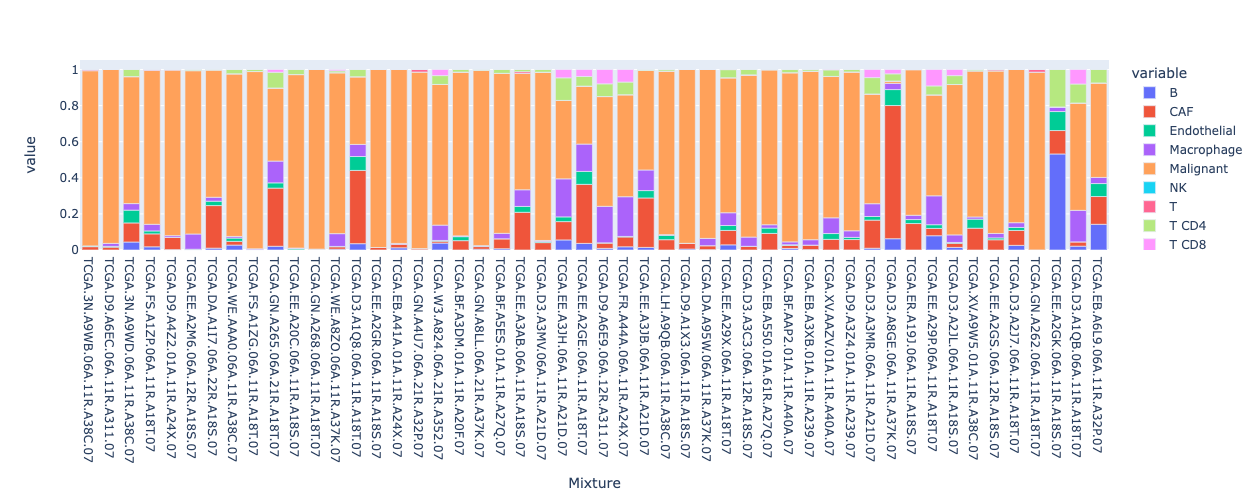

In [15]:
px.bar(csx_fraction_output_tcga_skcm.sample(50))

In [16]:
# QA
# do all rows start with "TCGA"?
assert not any(filter(lambda name: name[0:4] != 'TCGA', csx_fraction_output_tcga_skcm.index))

### compute mixtures

In [23]:
import importlib
import helpers
importlib.reload(helpers.creating_mixtures)

<module 'helpers.creating_mixtures' from '/home/jupyter/deconv/helpers/creating_mixtures.py'>

In [24]:
# params
rng = np.random.default_rng(seed=0)

In [25]:
%time

mixtures_in_silico, cell_type_geps = creating_mixtures.make_mixtures(
    sc_data,
    sc_metadata,
    sample_fractions=csx_fraction_output_tcga_skcm,
    n_cells_per_gep=5,
    rng=rng
)

In [26]:
mixtures_in_silico

,TCGA.3N.A9WB.06A.11R.A38C.07,TCGA.3N.A9WC.06A.11R.A38C.07,TCGA.3N.A9WD.06A.11R.A38C.07,TCGA.BF.A1PU.01A.11R.A18S.07,TCGA.BF.A1PV.01A.11R.A18U.07,TCGA.BF.A1PX.01A.12R.A18T.07,TCGA.BF.A1PZ.01A.11R.A18S.07,TCGA.BF.A1Q0.01A.21R.A18S.07,TCGA.BF.A3DJ.01A.11R.A20F.07,TCGA.BF.A3DL.01A.11R.A20F.07,...,TCGA.XV.AB01.06A.12R.A40A.07,TCGA.YD.A89C.06A.11R.A37K.07,TCGA.YD.A9TA.06A.11R.A39D.07,TCGA.YD.A9TB.06A.12R.A40A.07,TCGA.YG.AA3N.01A.11R.A38C.07,TCGA.YG.AA3O.06A.11R.A38C.07,TCGA.YG.AA3P.06A.11R.A38C.07,TCGA.Z2.A8RT.06A.11R.A37K.07,TCGA.Z2.AA3S.06A.11R.A39D.07,TCGA.Z2.AA3V.06A.11R.A39D.07
GeneSymbol,,,,,,,,,,,,,,,,,,,,,
C9orf152,0.000000,0.000000,0.000000,0.000000,0.458639,0.086482,0.000000,0.000000,0.000000,0.015078,...,0.000000,0.000000,0.016766,0.001156,0.000000,0.000000,0.000000,0.000856,0.000000,0.000000
RPS11,55.978551,52.143438,70.721973,65.940042,48.591648,58.009227,69.105760,49.617779,76.173553,46.889335,...,105.671707,46.288742,70.937850,69.872846,70.348174,95.759012,44.516197,39.447346,45.931728,69.156011
ELMO2,11.178681,10.033446,0.943065,1.383721,22.830979,3.454669,2.072426,1.088446,9.075044,8.635143,...,13.190067,18.529492,11.242718,5.317927,9.234306,0.824247,11.188077,11.180209,18.018972,10.626100
CREB3L1,0.233043,0.700092,0.317514,0.285727,0.268550,1.665803,0.040185,0.989097,0.000000,0.312719,...,0.543129,0.079415,4.123085,1.772564,0.180264,0.434184,0.000000,0.279058,0.000000,0.000000
PNMA1,9.015812,12.977498,2.254558,10.346272,4.827657,13.670458,0.095294,5.063181,0.910906,13.106266,...,0.360474,3.005776,2.528303,0.589452,3.608869,12.476437,5.438602,14.721191,21.856501,8.516596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PIK3IP1,0.662933,4.467882,7.163746,23.222088,0.483003,4.870114,0.257267,5.839014,3.547202,2.235914,...,9.170822,1.213959,3.741899,1.283127,4.024029,0.536758,7.027575,5.013931,12.035000,16.641895
SNRPD2,22.892059,24.948646,36.640674,27.874842,34.586583,28.627518,47.361855,29.122454,31.310957,36.350058,...,42.730133,34.889875,43.105369,42.129743,20.147940,54.838719,28.760286,34.716117,26.961166,35.228103
SLC39A6,27.082275,6.237194,15.974508,17.563909,2.396039,20.864823,21.550300,26.050802,18.067005,31.286582,...,8.166294,18.784140,11.331568,26.791204,8.999990,14.878857,17.123003,11.224347,24.044562,6.250831


In [27]:
sample_name = "TCGA.3N.A9WB.06A.11R.A38C.07"
cell_type_geps[sample_name]

,B,CAF,Endothelial,Macrophage,Malignant,NK,T,T CD4,T CD8
GeneSymbol,,,,,,,,,
C9orf152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RPS11,99.845685,49.211421,64.114265,60.188971,59.504838,85.241058,93.086488,100.022081,75.388005
ELMO2,16.829043,8.045146,12.084670,20.613646,10.992933,14.275555,21.266855,14.305934,0.000000
CREB3L1,0.000000,12.924884,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PNMA1,0.000000,6.100232,18.517000,5.437949,9.441378,0.000000,0.000000,10.571658,25.364903
...,...,...,...,...,...,...,...,...,...
PIK3IP1,0.000000,7.618770,22.083069,10.136773,0.000000,23.350397,74.832645,80.967203,24.426801
SNRPD2,42.468433,31.735399,24.384687,18.176182,21.669303,15.398378,39.684405,19.828183,37.474931
SLC39A6,21.287344,13.217517,10.841776,4.486567,26.824801,0.000000,13.962622,15.785108,0.000000


# output 1: check distribution (in silico vs real)

## visualize distributions by gene, in silico vs real

# output 2: estimated cell type fractions

## run cibersortx fractions on in silico mixtures

In [ ]:
import tempfile

In [ ]:
temp_dir = tempfile.TemporaryDirectory()

print(temp_dir)

In [ ]:
from helpers.running_csx import DockerJob, Experiment, InputFile

In [ ]:
experiments_root = "gs://liulab/csx_experiments/tcga_skcm_fractions"
experiment = Experiment(experiments_root, "test1")

In [ ]:
!tree -h {experiment.local_path}/..

In [ ]:
input_file_args = {
    "mixture": InputFile("mixturestirosh.txt", "gs://liulab/csx_example_files/Single_Cell_RNA-Seq_Melanoma_SuppFig_3b-d/mixture_melanoma_Tirosh_SuppFig_3b-d.txt"),
    "sigmatrix": InputFile()
}


In [ ]:

job = DockerJob(temp_dir, input_file_args, other_args)
    for copy_command in job.make_copy_commands():
        !{copy_command}
    !tree -h {job.path}
    docker_command = job.make_docker_command()
    print(docker_command)
    !{docker_command}
    !tree -h {job.path}
    !gsutil -m rsync -r -d {job.path} {experiment.gcs_uri}


### prep input files

In [ ]:
from helpers.csx_docker import save_valid_mixture_file, save_valid_fractions_file

with open("mixture.txt", "w") as f:
    save_valid_mixture_file(mixtures, f)
with open("fractions.txt", "w") as f:
    save_valid_fractions_file(fractions, f)

### run cibersortx

In [ ]:
run_csx(path='...')

### load and process outputs

## evaluate results

# output 3: estimated gene expression by cell type

## run cibersortx expression imputation on in silico mixtures

## volcano plot outputs

In [ ]:
# for each cell type, scatter plot (effect_size, p_value) for each gene